la phase d’importation et d’exploration initiale des données

In [ ]:
import sys
!{sys.executable} -m pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import sys : importe le module système de Python.

# pip install ucimlrepo : installe la librairie permettant de télécharger des datasets UCI.
# fetch_ucirepo(id=186) : télécharge la base de données Wine Quality
# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

***Data*** ***analysis***

 Load the data and show its summary. How many samples and inputs do we have?

In [ ]:
import pandas as pd
import numpy as np
# import pandas et numpy : librairies pour manipuler les données.
#pd.concat(...) : assemble les variables explicatives et la variable cible.
#df.shape : donne le nombre de lignes et colonnes.
# df.head() : affiche les premières lignes du dataset.
# The previous link resulted in a 404 error.
# We already have the full dataset (including both red and white wines)
# loaded via ucimlrepo into 'wine_quality.data.original'.
# Let's use that DataFrame directly.
df = wine_quality.data.original

print("\n========= Dataset summary ========= \n")
df.info()
print("\n========= A few first samples ========= \n")
print(df.head())


========= Dataset summary ========= 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB

========= A few first s

Form the arrays X RN d of the input variables and Y RN the output. What are the
 wine qualities and the related number of samples ?

In [ ]:
X = df.drop(["quality", "color"], axis=1) #we drop the column "quality" and "color"
Y = df["quality"]
print("\n========= Wine Qualities ========= \n")
print(Y.value_counts())
# f.drop : enlève les colonnes inutiles pour l’apprentissage.
#X : contient les variables explicatives.
#Y : contient la qualité du vin
#value_counts() : compte combien de vins appartiennent à chaque qualité.


========= Wine Qualities ========= 

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64


To form a binary classification problem, we group the data by quality level.

In [ ]:
 # bad wine (y=0) : quality <= 5 and good quality (y= 1) otherwise
 Y = [0 if val <=5 else 1 for val in Y]

Check the number of samples per class (we have now classes 0 and 1).

 Perform a statistical analysis (mean, variance, correlation ...) of the input variables.
 Comments on the results.

/tmp/ipython-input-146764304.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


<Axes: >

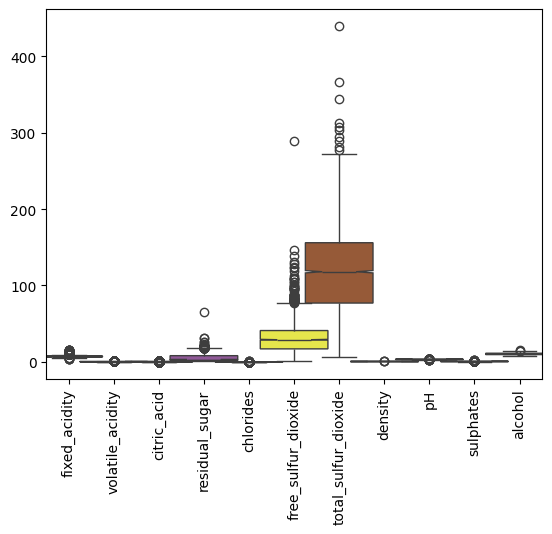

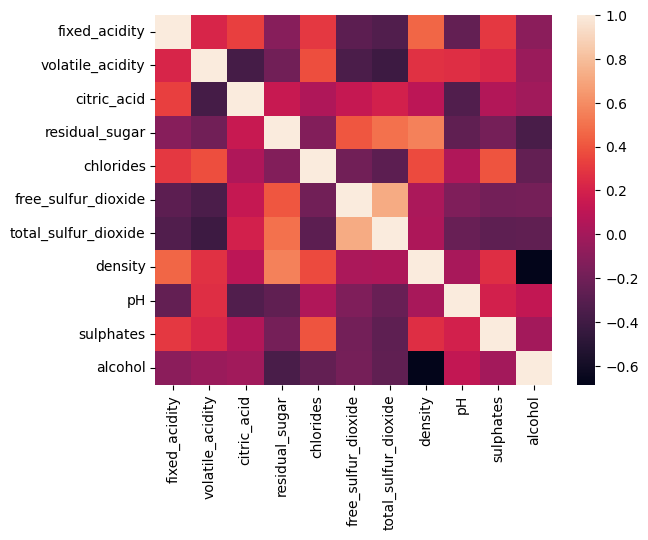

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#matplotlib et seaborn servent à tracer des graphiques.
#corr() : calcule les corrélations entre les variables.
#heatmap : affiche la matrice de corrélation.
plt.figure()
ax = plt.gca()
sns.boxplot(data=X,orient="v",palette="Set1",width=1.5, notch=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.figure()
# Exclude the 'color' column as it's non-numeric and causes the error
corr = X.drop('color', axis=1).corr()
sns.heatmap(corr)

## *Classification*

**`Data`** ***split***


 1. Randomly split-up (XY ) (keep the proportion of the labels) in three subsets Da =
 (XaYa), Dv = (Xv Yv) and Dt = (Xt Yt), respectively the training, validation and
 test set.

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
#train_test_split : sépare les données en apprentissage et validation.
#test_size=0.5 : moitié apprentissage, moitié validation.
#stratify=Y : garde les mêmes proportions de classes.
# Ensure X only contains numerical features by dropping non-numeric columns
# This handles cases where 'color' or other non-numeric columns might persist
non_numeric_cols = X.select_dtypes(exclude=np.number).columns
if len(non_numeric_cols) > 0:
    print(f"Dropping non-numeric columns from X: {list(non_numeric_cols)}")
    X = X.drop(columns=non_numeric_cols)

Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size=1/3,
stratify=Y)
Xa, Xv, Ya, Yv = train_test_split(Xa, Ya, shuffle=True, test_size=0.5,
stratify=Ya)

*** 2. Discuss why do we need to keep the class proportion and shuffle the data.***


*** k nearest neighbor (k-NN) classification***


 k-NN uses the samples in (Xa ya) as the reference data. Given any sample xi, the predicted
 label is the majority label of its k N neighbors in (Xa ya). The neighbors are the ones close to
 xi in terms of the Euclidean distance. d(xi xj)2 = xi xj 2 = (xi xj) (xi xj) xj
Da.
 1. As a starter let run k-NN with k = 3 and evaluate its performance on Dv by the error rate
 defined as
 error rate = 1
 N i D
 yi= yi
 with N, the size of set D, y and y respectively the predicted and true label.

In [ ]:
 from sklearn.neighbors import KNeighborsClassifier
 #KNN : algorithme basé sur les voisins les plus proches.
#fit() : entraîne le modèle.
#predict() : prédit les labels sur la validation.
#accuracy_score : calcule la précision.
 # Fit the model on (Xa, Ya)
 k = 3
 clf = KNeighborsClassifier(n_neighbors = k)
 clf.fit(Xa, Ya)
# Predict the labels of samples in Xv
 Ypred_v = clf.predict(Xv)
 # evaluate classification error rate
 from sklearn.metrics import accuracy_score
 error_v = 1-accuracy_score(Yv, Ypred_v)

 Inspiring from that, train the k-nn classifier for different values of k
N (in the range
 [140]) and evaluate its performance either on training set and validation set. Plot the
 training and validation error curves as a function of k. From the plots, point out the over
f
 itting issue.

In [ ]:
 # some hints
 #k_vector : liste des valeurs de k testées
k_vector = np.arange(1, 37, 2) #define a vector of k=1, 3, 5, ...
error_train = np.empty(k_vector.shape)
error_val = np.empty(k_vector.shape)
for ind, k in enumerate(k_vector):
    #fit with k
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(Xa, Ya)
    # predict and evaluate on training and validation sets
    Ypred_train = clf.predict(Xa)
    error_train[ind] = 1 - accuracy_score(Ya, Ypred_train)
    Ypred_val = clf.predict(Xv)
    error_val[ind] = 1 - accuracy_score(Yv, Ypred_val)

 How to choose the appropriate value of k ? Select the best value k of k based on the
 validation error.

In [ ]:
#k_star = meilleur nombre de voisins.
 # some hints: get the min error and related k-value
 err_min, ind_opt = error_val.min(), error_val.argmin()
 k_star = k_vector[ind_opt]

 For the selected k , what is the error rate on the data test ? Discuss the obtained results.

***Normalize or not normalize the data ?***

 So far, we have used the raw inputs without any normalization. To account for different
 input scales we normalize the data by removing the mean value of each feature and scale
 it by dividing by the standard deviation. Comment and explain the following codes. Is the
 applied normalization to the validation set sound ?

In [ ]:
 #StandardScaler : normalisation des données.
#fit() : calcule les moyennes et écarts-types.
transform() : applique la normalisation sur les données.
 from sklearn.preprocessing import StandardScaler
 sc = StandardScaler(with_mean=True, with_std=True)
 sc = sc.fit(Xa)
 Xa_n = sc.transform(Xa)
 Xv_n = sc.transform(Xv)

 2. Replicate the experiments from section 2.2 with the normalized data and compare the
 achieved performances with the one of section 2.2. Drawn the conclusions ?
 3. Howto make the trained models less sensitive to the data split ?